In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))

from src import h5py_funcs
from src.h5py_funcs import inspections

no cupy available, imported numpy as usual
Custom getstate functions for dwave.cloud.config.models.ClientConfig, dwave.cloud.client.qpu.Client, dwave.cloud.solver.StructuredSolver, dwave.system.samplers.dwave_sampler.DWaveSampler, dwave.system.composites.embedding.FixedEmbeddingComposite have been initialized.


In [2]:
import numpy as np
import pickle
import pandas
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
csv_file = r'C:\Users\oahre\RWTH\OneDrive_Students_RWTH\RWTH\Simulation_Sciences\Masterthesis\04_Code\Quantum_Annealing_for_Particle_Matching\00_tests\01_out\data_for_orange_sub_3.csv'
df = pandas.read_csv(csv_file)
df.sort_values('fraction_samples_is_found_best', ascending=False)

,identifier,annealing_time,programming_thermalization,readout_thermalization,estimated_runtime,is_found_best,num_runs_is_found_best,num_samples_is_found_best,num_samples,num_runs,num_matched,num_samples_matched,fraction_samples_is_found_best,fraction_samples_matched_3_samps_3_sols
153,zz_8929403640,680.221626,2366.887890,1123.693213,1.940263,1.0,10.0,165.0,10000.0,10.0,86.0,354.0,0.0165,0.0354
353,zz_4357410671,67.480512,106.261414,1236.054670,1.437623,1.0,10.0,165.0,10000.0,10.0,59.0,311.0,0.0165,0.0311
104,zz_2218790424,785.709530,4133.270420,971.577890,1.895402,1.0,10.0,160.0,10000.0,10.0,86.0,364.0,0.0160,0.0364
379,zz_4030559639,359.701277,267.207040,586.097375,1.080047,1.0,10.0,160.0,10000.0,10.0,59.0,333.0,0.0160,0.0333
323,zz_3691995048,402.242969,624.136310,3304.004535,3.840853,1.0,10.0,159.0,10000.0,10.0,126.0,301.0,0.0159,0.0301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,zz_3050548510,459.935482,3653.272195,352.739416,0.950310,1.0,10.0,72.0,10000.0,10.0,58.0,245.0,0.0072,0.0245
149,zz_4554848043,107.142924,2588.050645,135.174181,0.378887,1.0,10.0,72.0,10000.0,10.0,30.0,272.0,0.0072,0.0272
435,zz_7797828453,2.853625,1467.224346,88.062007,0.226364,1.0,10.0,72.0,10000.0,10.0,29.0,164.0,0.0072,0.0164
432,zz_9689815553,2.853625,3432.623711,3626.624811,3.766893,1.0,10.0,59.0,10000.0,10.0,91.0,147.0,0.0059,0.0147


In [4]:
csv_file_test = r'C:\Users\oahre\RWTH\OneDrive_Students_RWTH\RWTH\Simulation_Sciences\Masterthesis\04_Code\Quantum_Annealing_for_Particle_Matching\00_tests\01_out\data_for_orange_sub_3_test.csv'
df_test = pandas.read_csv(csv_file_test)
df_test

,annealing_time,programming_thermalization,readout_thermalization
0,556.623619,2899.175129,1106.265523
1,241.212156,1503.654920,1938.507524
2,476.820956,988.655860,859.103462
3,550.427939,1665.132578,1338.212654
4,926.842289,4590.661741,2836.858898
...,...,...,...
9995,78.688514,2738.870952,3839.920723
9996,499.032460,1569.288038,1737.363431
9997,593.013881,2458.074404,1205.412297
9998,799.538359,963.164327,1880.955609


In [5]:
#dataset
#array_like
#    Datapoints to estimate from. In case of univariate data this is a 1-D array, otherwise a 2-D array with shape (# of dims, # of data).
col_names = ['annealing_time','programming_thermalization', 'readout_thermalization', 'fraction_samples_is_found_best']
sampler_array = df[col_names].to_numpy()
print(sampler_array.shape)
sampler_array = sampler_array.transpose()
print(sampler_array.shape)
gkde = sp.stats.gaussian_kde(sampler_array)
print(gkde.d, gkde.n, gkde.neff)

(512, 4)
(4, 512)
4 512 512.0


In [6]:
sampelr_array_test = df_test[['annealing_time','programming_thermalization', 'readout_thermalization']].to_numpy()
print(sampelr_array_test.shape)
sampelr_array_test = sampelr_array_test.transpose()
print(sampelr_array_test.shape)
#gkde_eval = gkde(sampelr_array_test)
#print(gkde_eval)

(10000, 3)
(3, 10000)


In [7]:
#plt.scatter(sampelr_array_test[0], sampelr_array_test[1], c=gkde_eval)

In [ ]:
# == Import Required Libraries =================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# ATTENTION: Uncomment this line, if you're running on a Jupyter Notebook
%matplotlib notebook


def next_frame(total_frame_count: int = sampler_array.shape[1]):
    """
    Generate random 2D frames of varying dimensions.

    This function serves as a generator that yields 2D numpy arrays with random
    values. The dimensions of these arrays range between 5 and 50, inclusive.
    The generator will continue yielding arrays until the total_frame_count
    reaches zero.

    Parameters
    ----------
    total_frame_count : int, optional
        The number of frames to be generated. The default value is 10.

    Yields
    ------
    array_like
        2D numpy array with random values. The dimensions of the array range
        between 5 and 50, inclusive. In other words, the number points
        each frame of the animation will have varies between 5 and 50.

    Examples
    --------
    Use this function in a for-loop to generate and process frames:

    >>> frame_generator = next_frame(3)
    >>> for frame in frame_generator:
    >>>     print(frame.shape)
    (30, 2)
    (12, 2)
    (48, 2)

    Notes
    -----
    This function can be used to generate frames for an animation iteratively.
    """
    while total_frame_count > 0:
        yield sampler_array[:,-(total_frame_count-1)]
        total_frame_count -= 1


def update(frame):
    """
    Update a scatter plot with new data.

    This function clears the current scatter plot in the 'ax' Axes object,
    sets the plot limits, and then creates a new scatter plot based on the
    provided 2D frame. The 'ax' Axes object must be pre-defined.

    Parameters
    ----------
    frame : array_like
        A 2D array where each row represents a point in the scatter plot.
        The first column represents the x-values, and the second column
        represents the y-values.

    Returns
    -------
    scat : PathCollection
        A collection of paths that make up the scatter plot.

    Raises
    ------
    NameError
        If 'ax' isn't defined in the scope where this function is called.

    Examples
    --------
    This function can be used in animation generation:

    >>> import matplotlib.pyplot as plt
    >>> import matplotlib.animation as animation
    >>> fig, ax = plt.subplots()
    >>> ani = animation.FuncAnimation(fig, update, frames=next_frame(3))
    >>> plt.show()
    """

    # Clear the last scatter plot
    #ax.clear()

    # Set the limits of your plot again
    # NOTE: You might want to dynamically set these limits based on the new frame
    #       values that you're plotting.
    
    x_id = 0
    y_id = 1
    z_id = 2
    c_id = 3
    
    ax.clear()
    ax.set_xlim(0, np.max(sampler_array[0]))
    ax.set_ylim(0, np.max(sampler_array[1]))
    ax.set_zlim(0, np.max(sampler_array[2]))
    # Plot the new scatter plot
    scat = ax.scatter(xs=sampler_array[x_id,:frame], ys=sampler_array[y_id,:frame], zs=sampler_array[z_id,:frame], c=sampler_array[c_id,:frame], cmap='viridis', vmin=0.0, vmax=1.0)
    ax.set_xlabel(col_names[x_id])
    ax.set_ylabel(col_names[y_id])
    ax.set_zlabel(col_names[z_id])
    print(frame, end='\r')
    return scat


# == Create the Animation ======================================================
# Create a figure and an Axes object
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Set the initial limits of your plot
ax.set_xlim(0, np.max(sampler_array[0]))
ax.set_ylim(0, np.max(sampler_array[1]))
ax.set_zlim(0, np.max(sampler_array[2]))


# Create the animation object
fps = 1000
ani = FuncAnimation(fig=fig, func=update, frames=sampler_array.shape[1], interval=1)#, frames=next_frame)

# Convert the animation to HTML5 video
video = ani.save(r'..\\video.gif',)


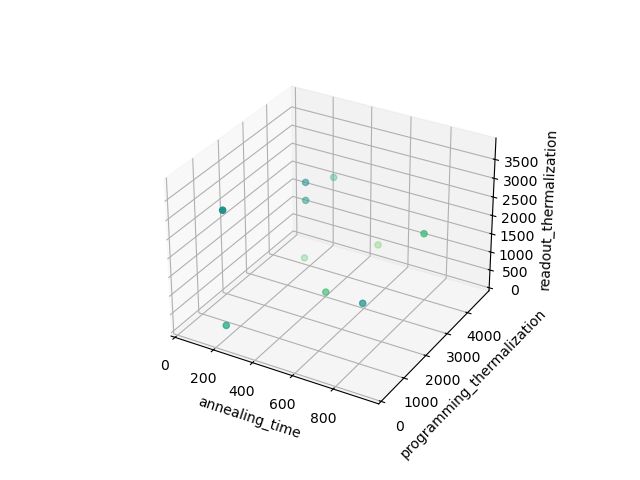

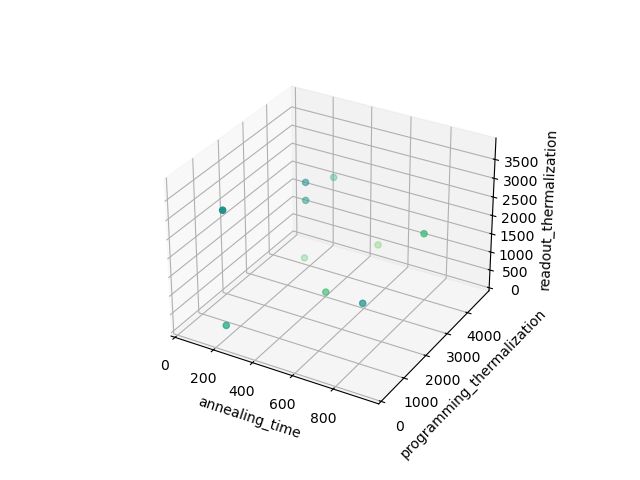

In [15]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

nth_best = 30
nth_worst = 10
x_id = 0
y_id = 1
z_id = 2
c_id = 3
# Set the initial limits of your plot
ax.set_xlim(0, np.max(sampler_array[0]))
ax.set_ylim(0, np.max(sampler_array[1]))
ax.set_zlim(0, np.max(sampler_array[2]))
# Plot the new scatter plot
#ax.scatter(xs=sampler_array[x_id,:nth_best], ys=sampler_array[y_id,:nth_best], zs=sampler_array[z_id,:nth_best], c=sampler_array[c_id,:nth_best], cmap='viridis', vmin=0.0, vmax=np.max(sampler_array[c_id,:]))
ax.scatter(xs=sampler_array[x_id,-nth_worst:], ys=sampler_array[y_id,-nth_worst:], zs=sampler_array[z_id,-nth_worst:], c=sampler_array[c_id,-nth_worst:], cmap='viridis', vmin=0.0, vmax=np.max(sampler_array[c_id,:]))
ax.set_xlabel(col_names[x_id])
ax.set_ylabel(col_names[y_id])
ax.set_zlabel(col_names[z_id])

fig.show()